In [22]:
import numpy as np
import pandas as pd

In [17]:
import os

csv_path = os.path.join('..', 'data', 'country_name.csv')
df_country = pd.read_csv(csv_path)
df_country = df_country[['zh_CN']]
df_country

,zh_CN
0,阿鲁巴
1,阿富汗
2,安哥拉
3,安圭拉
4,奥兰群岛
...,...
244,萨摩亚
245,也门
246,南非
247,赞比亚


In [20]:
all_countries = df_country['zh_CN'].tolist()
print(f"Get {len(all_countries)} countries")
print("Example:", all_countries[:10])

Get 249 countries
Example: ['阿鲁巴', '阿富汗', '安哥拉', '安圭拉', '奥兰群岛', '阿尔巴尼亚', '安道尔', '阿拉伯联合酋长国', '阿根廷', '亚美尼亚']


In [ ]:
from gensim.models import KeyedVectors

model_1 = KeyedVectors.load("tencent_vectors.gensim")


In [24]:
available_countries = [c for c in all_countries if c in model_1.key_to_index]

print(f"Original number of countries: {len(all_countries)}")
print(f"Available countries in the model: {len(available_countries)}")

Original number of countries: 249
Available countries in the model: 142


In [25]:
country_vectors = [model_1[country] for country in available_countries]

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# List to numpy array
vector_matrix = np.array(country_vectors)

# Calculating similarity
similarity_matrix = cosine_similarity(vector_matrix)

# Numpy array to dataframe
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=available_countries,
    columns=available_countries
)

print(similarity_df.iloc[:5, :5])

           阿富汗       安哥拉       阿根廷      亚美尼亚       南极洲
阿富汗   1.000000  0.706377  0.506424  0.636213  0.464104
安哥拉   0.706377  1.000000  0.603961  0.550597  0.485274
阿根廷   0.506424  0.603961  1.000000  0.591384  0.478596
亚美尼亚  0.636213  0.550597  0.591384  1.000000  0.400348
南极洲   0.464104  0.485274  0.478596  0.400348  1.000000


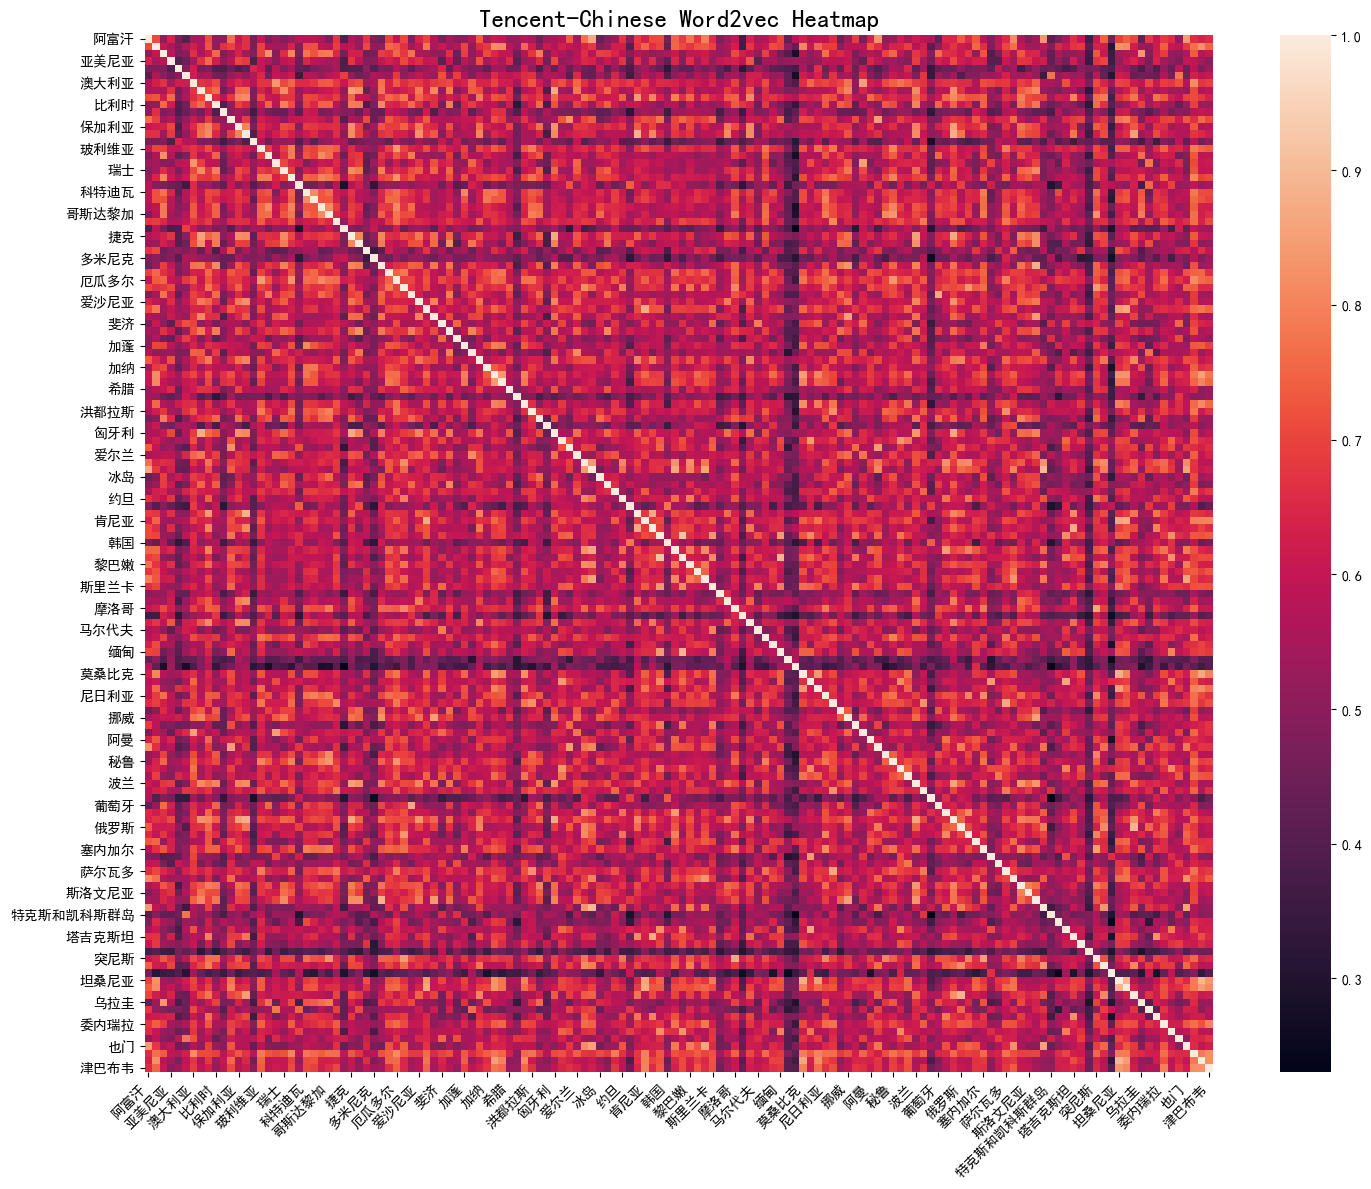

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def plot_similarity_heatmap(df):
    plt.figure(figsize=(15, 12))
    sns.heatmap(
        df,
        #annot=False,
        #fmt=".2f",
        #cmap=None, 
        #linewidths=.5,
        #linecolor=None,
        #cbar_kws={'label': 'Word2vec 余弦相似度'}
    )
    
    plt.title('Tencent-Chinese Word2vec Heatmap', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

plot_similarity_heatmap(similarity_df)